In [8]:
#|default_exp plotting

In [9]:
#|export
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#|export
def rgba_from_vals(vs, q=0.0, cmap="viridis", vmin=None, vmax=None):
    if isinstance(q,list):
        v_min = np.quantile(vs, q[0])
        v_max = np.quantile(vs, q[1])
    else:
        v_min = np.quantile(vs, q)
        v_max = np.max(vs)

    if vmax is not None: v_max = vmax
    if vmin is not None: v_min = vmin

    cm  = getattr(plt.cm, cmap)
    vs_ = np.clip(vs, v_min, v_max)
    cs  = cm(plt.Normalize()(vs_))
    return cs

True

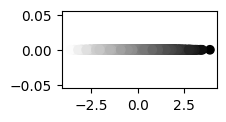

In [11]:
vs = np.random.randn(10000)
cs = rgba_from_vals(vs, q=0.0, cmap="binary")

plt.figure(figsize=(2,1))
plt.scatter(vs, np.zeros(len(vs)), c=cs)
np.quantile(vs, 0.0) == np.min(vs)

In [12]:
#|export
from matplotlib.collections import LineCollection


def line_collection(a, b, c=None, linewidth=1, **kwargs):
    lines = np.column_stack((a, b)).reshape(-1, 2, 2)
    lc = LineCollection(lines, colors=c, linewidths=linewidth, **kwargs)
    return lc



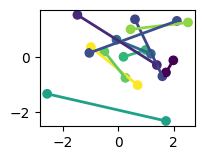

In [13]:
n = 10
a = np.random.randn(n,2)
b = np.random.randn(n,2)
v = np.random.randn(n)
c = rgba_from_vals(v, q=0.0, cmap="viridis")
lc = line_collection(a, b, linewidth=2)
lc.set_colors(c)


# -------------------
plt.figure(figsize=(2,2))
plt.gca().set_aspect(1)
plt.gca().add_collection(lc)
plt.scatter(*a.T, c=c)
plt.scatter(*b.T, c=c)

In [22]:
#|export
def plot_segs(ax, segs, c="k", linewidth=1, **kwargs):
    n = 10
    segs = segs.reshape(-1,2,2)
    a = segs[:,0]
    b = segs[:,1]
    lc = line_collection(a, b, linewidth=linewidth, **kwargs)
    lc.set_colors(c)
    ax.add_collection(lc)

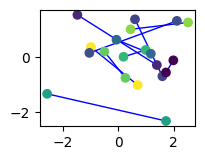

In [23]:
segs = np.stack([a,b],axis=1) 
# -------------------
plt.figure(figsize=(2,2))
plt.gca().set_aspect(1)
plot_segs(plt.gca(), segs, c="b", linewidth=1, zorder=-1)
plt.scatter(*a.T, c=c)
plt.scatter(*b.T, c=c)


In [24]:
#|export
def zoom_in(ax, x, pad):
    ax.set_xlim(np.min(x[...,0])-pad, np.max(x[...,0])+pad)
    ax.set_ylim(np.min(x[...,1])-pad, np.max(x[...,1])+pad)